In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("dupli_train.csv", engine = "python", error_bad_lines=False)
df.shape

<ipython-input-2-1017db50b427>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("dupli_train.csv", engine = "python", error_bad_lines=False)
Skipping line 61187: unexpected end of data


(61185, 6)

In [5]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [6]:
df.loc[df["is_duplicate"]==1, ['question1', 'question2']].head(4)

,question1,question2
5,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan..."
7,How can I be a good geologist?,What should I do to be a great geologist?
11,How do I read and find my YouTube comments?,How can I see all my Youtube comments?
12,What can make Physics easy to learn?,How can you make physics easy to learn?


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61185 entries, 0 to 61184
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            61185 non-null  int64 
 1   qid1          61185 non-null  int64 
 2   qid2          61185 non-null  int64 
 3   question1     61185 non-null  object
 4   question2     61185 non-null  object
 5   is_duplicate  61185 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.8+ MB


In [3]:
#drop the rows with even one null value
df.dropna(inplace = True)
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
#for total number of duplicate rows
df.duplicated().sum()

0

In [10]:
print(df['is_duplicate'].value_counts())

0    38355
1    22830
Name: is_duplicate, dtype: int64


In [11]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

0    62.686933
1    37.313067
Name: is_duplicate, dtype: float64


<Axes: >

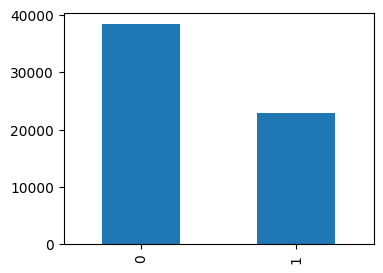

In [12]:
plt.figure(figsize=(4, 3))
df['is_duplicate'].value_counts().plot(kind = 'bar')

In [4]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 106874
Number of questions getting repeated 9840


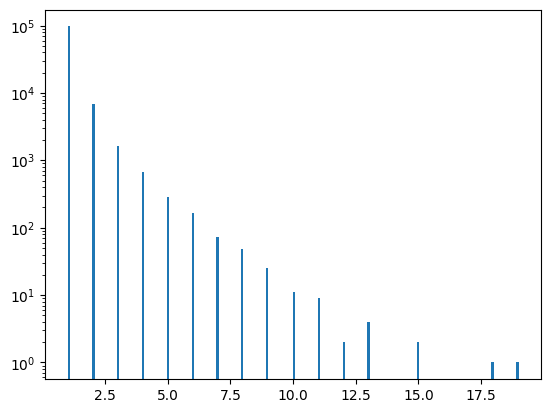

In [14]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=200)
plt.yscale('log')
plt.show()

**Applying only Bag-of-Words to text features**

In [5]:
new_df = df.sample(30000)

In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
new_df.duplicated().sum()

0

In [8]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
20924,Is it possible to watch 3D films on Samsung Ge...,What's the cheapest way to set up Samsung VR g...
26280,What is the difference between where have you ...,"What's the difference between ""had been"" and ""..."
11776,What exercises do you recommend to be able to ...,"Once I am able to do vibrato in singing, will ..."
42517,Why is rotor field winding excited by DC but n...,Why do we excite field winding of an alternato...
15611,Is Hotspot Shield safe to use?,Is it safe to use a damaged electrical cord?


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [20]:
q1_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [22]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
1164,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
20594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2985,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
25787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [24]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
1164,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
20594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2985,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
25787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.747

In [27]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7258333333333333

**Time to add some basic features and then apply Bag-of-Words(BoG)**

0    18840
1    11160
Name: is_duplicate, dtype: int64
0    62.8
1    37.2
Name: is_duplicate, dtype: float64


<Axes: >

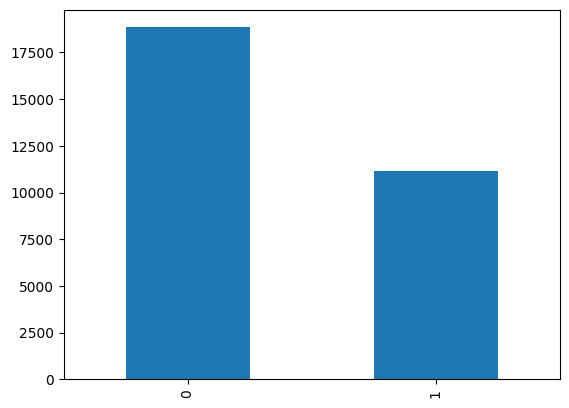

In [28]:
# Distribution of 2 categories of "is_duplicate" coloumn i.e. target column

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [13]:
# questions which were repeated

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55350
Number of questions getting repeated 3488


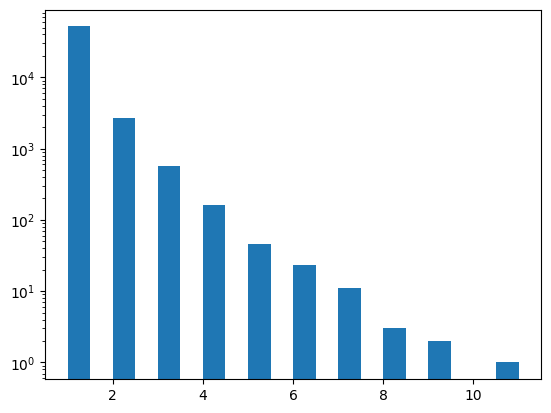

In [30]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=20)
plt.yscale('log')
plt.show()

In [14]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [32]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
1164,1164,2320,2321,What can one do to relieve severe chronic pain?,What has worked for you to help relieve chroni...,1,47,53
20594,20594,25673,37130,How can I start preparing for ias exam? I have...,How do I start IAS preparation along with BE e...,1,53,57
2985,2985,5919,5920,How can I answer college admissions interview ...,"What is the craziest answer for, ""why should w...",0,82,58
25787,25787,48047,48048,What is the difference between a research ques...,What is the difference between research questi...,0,74,73
1064,1064,2122,2123,What are some good blogs on Quora?,What are some of the best blogs for articles o...,0,34,54


In [15]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
20924,20924,39433,39434,Is it possible to watch 3D films on Samsung Ge...,What's the cheapest way to set up Samsung VR g...,0,52,50,11,10
26280,26280,48935,48936,What is the difference between where have you ...,"What's the difference between ""had been"" and ""...",0,74,56,14,9
11776,11776,22727,22728,What exercises do you recommend to be able to ...,"Once I am able to do vibrato in singing, will ...",0,62,70,12,15
42517,42517,76602,76603,Why is rotor field winding excited by DC but n...,Why do we excite field winding of an alternato...,0,52,88,11,17
15611,15611,29811,29812,Is Hotspot Shield safe to use?,Is it safe to use a damaged electrical cord?,0,30,44,6,9


In [16]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [17]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
20924,20924,39433,39434,Is it possible to watch 3D films on Samsung Ge...,What's the cheapest way to set up Samsung VR g...,0,52,50,11,10,2
26280,26280,48935,48936,What is the difference between where have you ...,"What's the difference between ""had been"" and ""...",0,74,56,14,9,4
11776,11776,22727,22728,What exercises do you recommend to be able to ...,"Once I am able to do vibrato in singing, will ...",0,62,70,12,15,4
42517,42517,76602,76603,Why is rotor field winding excited by DC but n...,Why do we excite field winding of an alternato...,0,52,88,11,17,4
15611,15611,29811,29812,Is Hotspot Shield safe to use?,Is it safe to use a damaged electrical cord?,0,30,44,6,9,3


In [18]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [19]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
20924,20924,39433,39434,Is it possible to watch 3D films on Samsung Ge...,What's the cheapest way to set up Samsung VR g...,0,52,50,11,10,2,21
26280,26280,48935,48936,What is the difference between where have you ...,"What's the difference between ""had been"" and ""...",0,74,56,14,9,4,21
11776,11776,22727,22728,What exercises do you recommend to be able to ...,"Once I am able to do vibrato in singing, will ...",0,62,70,12,15,4,26
42517,42517,76602,76603,Why is rotor field winding excited by DC but n...,Why do we excite field winding of an alternato...,0,52,88,11,17,4,27
15611,15611,29811,29812,Is Hotspot Shield safe to use?,Is it safe to use a damaged electrical cord?,0,30,44,6,9,3,15


In [20]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
20924,20924,39433,39434,Is it possible to watch 3D films on Samsung Ge...,What's the cheapest way to set up Samsung VR g...,0,52,50,11,10,2,21,0.10
26280,26280,48935,48936,What is the difference between where have you ...,"What's the difference between ""had been"" and ""...",0,74,56,14,9,4,21,0.19
11776,11776,22727,22728,What exercises do you recommend to be able to ...,"Once I am able to do vibrato in singing, will ...",0,62,70,12,15,4,26,0.15
42517,42517,76602,76603,Why is rotor field winding excited by DC but n...,Why do we excite field winding of an alternato...,0,52,88,11,17,4,27,0.15
15611,15611,29811,29812,Is Hotspot Shield safe to use?,Is it safe to use a damaged electrical cord?,0,30,44,6,9,3,15,0.20


minimum characters 1
maximum characters 623
average num of characters 59


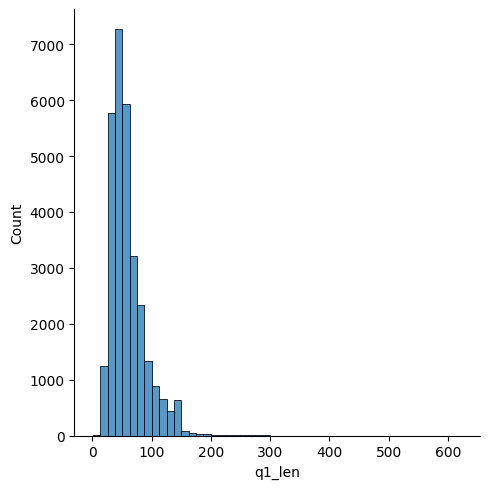

In [39]:
# Analysis of features
sns.displot(new_df['q1_len'], bins = 50)
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 1
maximum characters 384
average num of characters 59


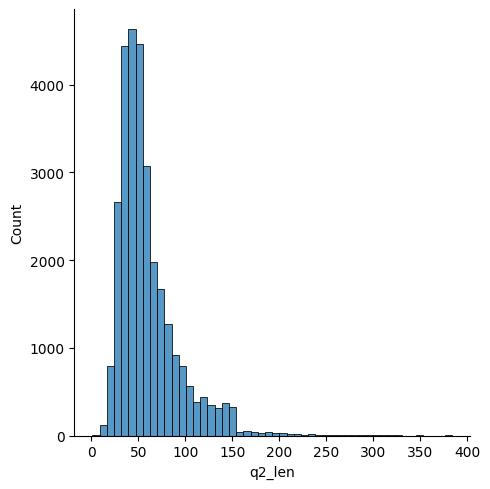

In [40]:
sns.displot(new_df['q2_len'], bins = 50)
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 125
average num of words 10


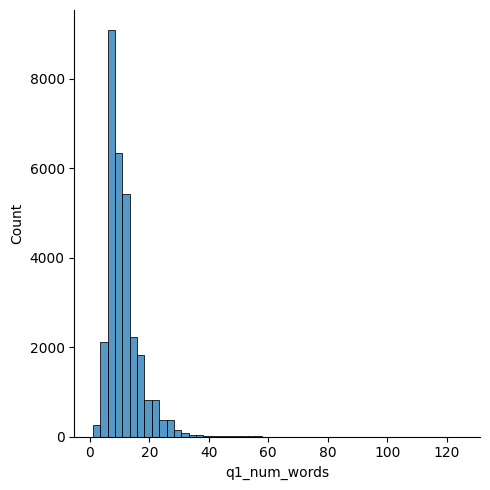

In [41]:
sns.displot(new_df['q1_num_words'], bins = 50)
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 73
average num of words 11


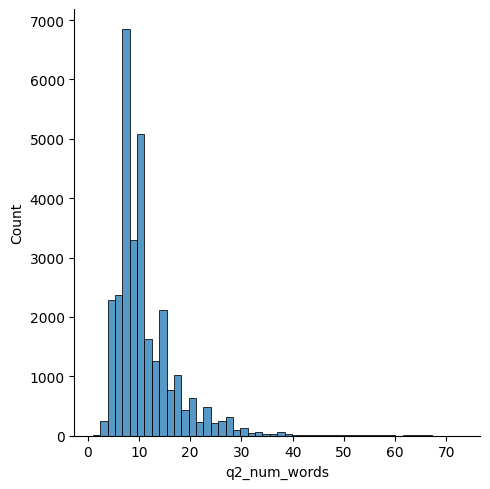

In [42]:
sns.displot(new_df['q2_num_words'], bins = 50)
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

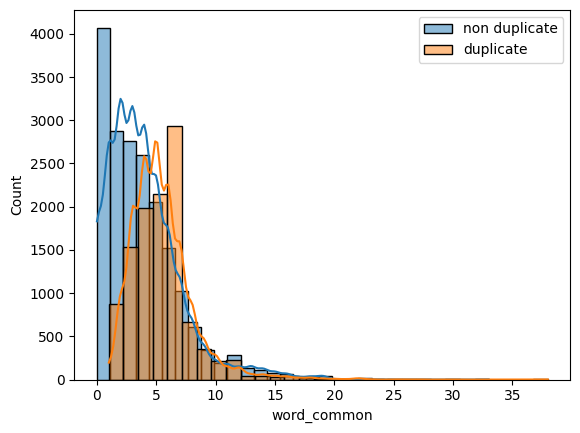

In [43]:
# common words
sns.histplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate', kde = True, bins = 30)
sns.histplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate', kde = True, bins = 30)
plt.legend()
plt.show()

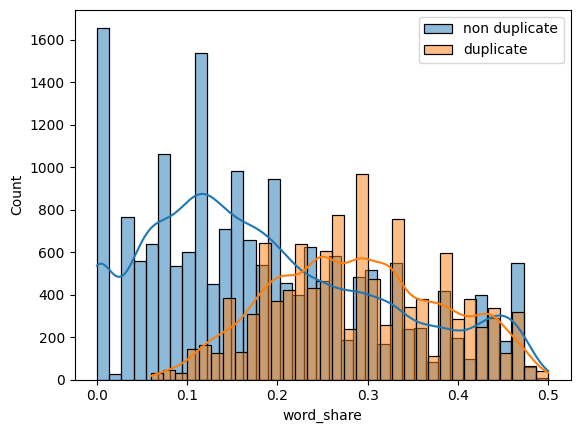

In [44]:
# word share
sns.histplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate', kde = True)
sns.histplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate', kde = True)
plt.legend()
plt.show()

In [21]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
20924,Is it possible to watch 3D films on Samsung Ge...,What's the cheapest way to set up Samsung VR g...
26280,What is the difference between where have you ...,"What's the difference between ""had been"" and ""..."
11776,What exercises do you recommend to be able to ...,"Once I am able to do vibrato in singing, will ..."
42517,Why is rotor field winding excited by DC but n...,Why do we excite field winding of an alternato...
15611,Is Hotspot Shield safe to use?,Is it safe to use a damaged electrical cord?


In [22]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
20924,0,52,50,11,10,2,21,0.10
26280,0,74,56,14,9,4,21,0.19
11776,0,62,70,12,15,4,26,0.15
42517,0,52,88,11,17,4,27,0.15
15611,0,30,44,6,9,3,15,0.20


In [23]:
#from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [24]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [25]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
20924,0,52,50,11,10,2,21,0.10,0,0,...,0,0,0,0,0,0,0,0,0,0
26280,0,74,56,14,9,4,21,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
11776,0,62,70,12,15,4,26,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
42517,0,52,88,11,17,4,27,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
15611,0,30,44,6,9,3,15,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.766

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.765

# **It's time for some advance features**<br>
**1.** **Token Features** <br>
**cwc_min**: This is the ratio of the number of common words to the length of the smaller question<br>
**cwc_max**: This is the ratio of the number of common words to the length of the larger question<br>
**csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions<br>
**csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions<br>
**ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions<br>
**ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions<br>
**last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise<br>
**first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise<br>
**2.Length Based Features**<br>
**mean_len**: Mean of the length of the two questions (number of words)<br>
**abs_len_diff**: Absolute difference between the length of the two questions (number of words)<br>
**longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question<br>
**3.Fuzzy Features**<br>
**fuzz_ratio**: fuzz_ratio score from fuzzywuzzy<br>
**fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy<br>
**token_sort_ratio**: token_sort_ratio from fuzzywuzzy<br>
**token_set_ratio**: token_set_ratio from fuzzywuzzy<br>